# Introduction to the project

## Context

For our final project we are collaborating with Neta Shvil a PhD student in Biology in Tel Aviv university. Her research focuses on neuroscience and how odor are perceived by animals. During her PhD she studied more specifically how antenas on locuses record and identify smells. Here we would like to continue her word and propose different and more elaborate algorithm for ordor classification.
Her experiment consist of 1 or 2 antenas cut of (on both sides) from an locus placed in a conductive gel and on which 2 electrodes are mounted on each extremity. This is linked to a recording computer. A smell is then send in the direction of the antenna producing a stimuli by the antenna and recorded at 100Hz. Hence, the data consist of a spectral recording of differents smells. In total 8 smells were tested in this manner.



# Initial Exploratory  Data Analysis

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

The dataset is composed of about 972 rows and 155 columns. This data set has been slightly preprocessed by Neta and he students in order to (i) withdraw the the physical influence of the blow of the smell and (ii) normalise the offset of each smell (making each record start at the t0) and (iii) substract the blank.

In [2]:
df = pd.read_csv('../../data/raw/single_odor.csv')
df.head()

,t0,t1,t2,t3,t4,t5,t6,t7,t8,t9,...,t145,t146,t147,t148,t149,t150,label,ID,date,channel
0,-12.666667,-5.333333,1.333333,0.666667,-2.666667,0.666667,20.666667,51.666667,69.333333,51.333333,...,-140.000000,-168.000000,-192.000000,-214.000000,-233.333333,-245.000000,8-Van,83,1.12,1
1,-9.666667,-18.333333,-31.666667,-43.333333,-38.666667,-12.333333,27.666667,59.666667,70.333333,62.333333,...,-251.000000,-234.000000,-217.000000,-214.000000,-230.333333,-258.000000,8-Van,83,1.12,1
2,-59.166667,-67.833333,-66.166667,-56.833333,-42.166667,-28.833333,-23.833333,-27.833333,-38.166667,-48.166667,...,-254.500000,-274.500000,-296.500000,-302.500000,-282.833333,-245.500000,8-Van,83,1.12,1
3,56.166667,58.500000,32.166667,-3.500000,-23.833333,-24.500000,-15.500000,-10.500000,-15.833333,-35.833333,...,-1996.166667,-1945.166667,-1872.166667,-1798.166667,-1736.500000,-1686.166667,5-Lem,83,1.12,1
4,59.833333,59.166667,54.833333,53.166667,56.833333,66.166667,83.166667,109.166667,133.833333,133.833333,...,-1770.500000,-1814.500000,-1803.500000,-1722.500000,-1594.833333,-1472.500000,5-Lem,83,1.12,1


In [3]:
df.shape

(972, 155)

In [4]:
df.isna().sum().sort_values(ascending=False)

t0         0
t106       0
t99        0
t100       0
t101       0
          ..
t52        0
t53        0
t54        0
t55        0
channel    0
Length: 155, dtype: int64

We see above that the data does not contain any nan or null values.

We have 2 columns that are not usefull for us: The date of the experiment and the channel used.  
The channel used has only one value and the date of the day the experiment was done has no impact to the experiment itself.

In [5]:
df = df.drop(columns=['date', 'channel'])
df.head()

,t0,t1,t2,t3,t4,t5,t6,t7,t8,t9,...,t143,t144,t145,t146,t147,t148,t149,t150,label,ID
0,-12.666667,-5.333333,1.333333,0.666667,-2.666667,0.666667,20.666667,51.666667,69.333333,51.333333,...,-121.000000,-119.666667,-140.000000,-168.000000,-192.000000,-214.000000,-233.333333,-245.000000,8-Van,83
1,-9.666667,-18.333333,-31.666667,-43.333333,-38.666667,-12.333333,27.666667,59.666667,70.333333,62.333333,...,-266.000000,-258.666667,-251.000000,-234.000000,-217.000000,-214.000000,-230.333333,-258.000000,8-Van,83
2,-59.166667,-67.833333,-66.166667,-56.833333,-42.166667,-28.833333,-23.833333,-27.833333,-38.166667,-48.166667,...,-259.500000,-250.166667,-254.500000,-274.500000,-296.500000,-302.500000,-282.833333,-245.500000,8-Van,83
3,56.166667,58.500000,32.166667,-3.500000,-23.833333,-24.500000,-15.500000,-10.500000,-15.833333,-35.833333,...,-2027.166667,-2017.833333,-1996.166667,-1945.166667,-1872.166667,-1798.166667,-1736.500000,-1686.166667,5-Lem,83
4,59.833333,59.166667,54.833333,53.166667,56.833333,66.166667,83.166667,109.166667,133.833333,133.833333,...,-1680.500000,-1711.166667,-1770.500000,-1814.500000,-1803.500000,-1722.500000,-1594.833333,-1472.500000,5-Lem,83


### target

In [6]:
labels = df['label']
labels.shape

(972,)

In [7]:
labels.unique()

array(['8-Van', '5-Lem', '4-Rose', '6-Ger', '3-Ethyl', '2-Hex', '7-Cit',
       '1-Benz'], dtype=object)

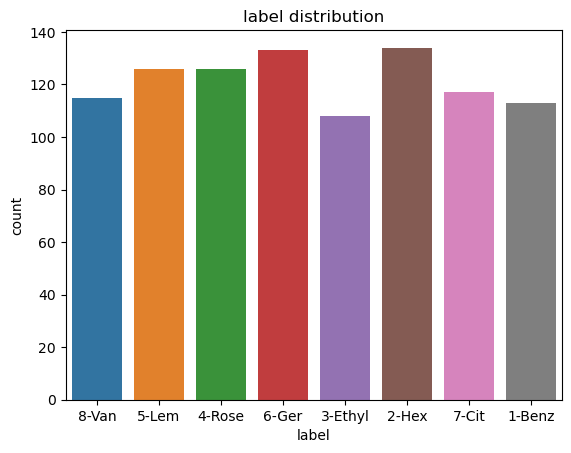

In [8]:
ax = sns.countplot(data=df, x=labels).set_title("label distribution")

The target feature is the digit of the smell.

We can see below the 8 different smells labeled : 

    - 1 Benzaldehyde
    - 2- Hexanol
    - 3- Ethyl
    - 4- Rose
    - 5- Lemon
    - 6- Geraniol
    - 7- Citronellol
    - 8- Vanilla

In [9]:
df['label'].value_counts()

2-Hex      134
6-Ger      133
5-Lem      126
4-Rose     126
7-Cit      117
8-Van      115
1-Benz     113
3-Ethyl    108
Name: label, dtype: int64

WE have a mostly well balanced target feature with approx 100 to 134 sample per label.

Our target variable is categorical, we are on a classification problem.  
We can also see that we have to encode this feature and we have 8 classes.

In [10]:
y = df['label'].apply(lambda row: int(row[0]))

In [11]:
X = df.loc[:, df.columns != 'label']
X.head()

,t0,t1,t2,t3,t4,t5,t6,t7,t8,t9,...,t142,t143,t144,t145,t146,t147,t148,t149,t150,ID
0,-12.666667,-5.333333,1.333333,0.666667,-2.666667,0.666667,20.666667,51.666667,69.333333,51.333333,...,-149.000000,-121.000000,-119.666667,-140.000000,-168.000000,-192.000000,-214.000000,-233.333333,-245.000000,83
1,-9.666667,-18.333333,-31.666667,-43.333333,-38.666667,-12.333333,27.666667,59.666667,70.333333,62.333333,...,-274.000000,-266.000000,-258.666667,-251.000000,-234.000000,-217.000000,-214.000000,-230.333333,-258.000000,83
2,-59.166667,-67.833333,-66.166667,-56.833333,-42.166667,-28.833333,-23.833333,-27.833333,-38.166667,-48.166667,...,-269.500000,-259.500000,-250.166667,-254.500000,-274.500000,-296.500000,-302.500000,-282.833333,-245.500000,83
3,56.166667,58.500000,32.166667,-3.500000,-23.833333,-24.500000,-15.500000,-10.500000,-15.833333,-35.833333,...,-2045.166667,-2027.166667,-2017.833333,-1996.166667,-1945.166667,-1872.166667,-1798.166667,-1736.500000,-1686.166667,83
4,59.833333,59.166667,54.833333,53.166667,56.833333,66.166667,83.166667,109.166667,133.833333,133.833333,...,-1700.500000,-1680.500000,-1711.166667,-1770.500000,-1814.500000,-1803.500000,-1722.500000,-1594.833333,-1472.500000,83


In [12]:
X.describe()

,t0,t1,t2,t3,t4,t5,t6,t7,t8,t9,...,t142,t143,t144,t145,t146,t147,t148,t149,t150,ID
count,972.000000,972.000000,972.000000,972.000000,972.000000,972.000000,972.000000,972.000000,972.000000,972.000000,...,972.000000,972.000000,972.000000,972.000000,972.000000,972.000000,972.000000,972.000000,972.000000,972.000000
mean,-4.711282,-5.345198,-4.347599,-2.395267,-0.744547,1.206928,6.290433,16.342902,24.898458,16.832785,...,-726.496433,-710.030555,-691.799588,-672.456309,-653.182475,-634.919272,-617.723285,-601.783127,-586.645267,72.648148
std,124.302226,123.464933,122.441921,120.794010,118.430023,117.050180,118.530131,123.625398,129.587484,134.648984,...,751.497348,736.054639,721.212175,707.178159,693.881662,680.804428,667.980399,656.684561,647.042562,40.949614
min,-1169.833333,-1228.833333,-1227.166667,-1159.166667,-1063.833333,-1050.000000,-1056.666667,-1093.666667,-1348.333333,-1565.666667,...,-4027.666667,-3990.000000,-3995.333333,-3991.333333,-4033.333333,-4101.333333,-4217.333333,-4440.000000,-4637.333333,1.000000
25%,-32.416667,-32.666667,-32.458333,-32.916667,-32.000000,-28.708333,-26.708333,-18.000000,-12.083333,-17.333333,...,-966.083333,-933.250000,-909.666667,-902.416667,-867.375000,-844.687500,-821.666667,-796.291667,-784.875000,39.000000
50%,-1.833333,-1.750000,-0.166667,0.833333,-0.166667,1.166667,6.000000,15.666667,23.916667,16.000000,...,-479.666667,-463.833333,-457.666667,-438.166667,-422.500000,-407.000000,-392.500000,-378.750000,-364.583333,71.000000
75%,26.000000,27.583333,31.375000,30.541667,32.708333,35.000000,44.000000,59.041667,70.666667,58.958333,...,-218.500000,-210.000000,-202.791667,-194.625000,-185.333333,-182.541667,-180.125000,-177.708333,-168.875000,95.000000
max,1055.500000,1068.833333,1110.166667,1165.166667,1196.166667,1172.500000,1112.500000,1057.833333,1018.500000,949.166667,...,1830.000000,1623.666667,1458.333333,1465.833333,1830.500000,1900.166667,1672.833333,1354.833333,1139.166667,149.000000


Finally the ID feature represent the identification of the antenna. We will need to be carefull during the splitting stage to make sure that the same antenna is not in train and test, to prevent data leakage.

### Representation of the time as numerical features.

All our features are continuous numerical features but we can see that they are of different ranges it might be interessting to normalize them.

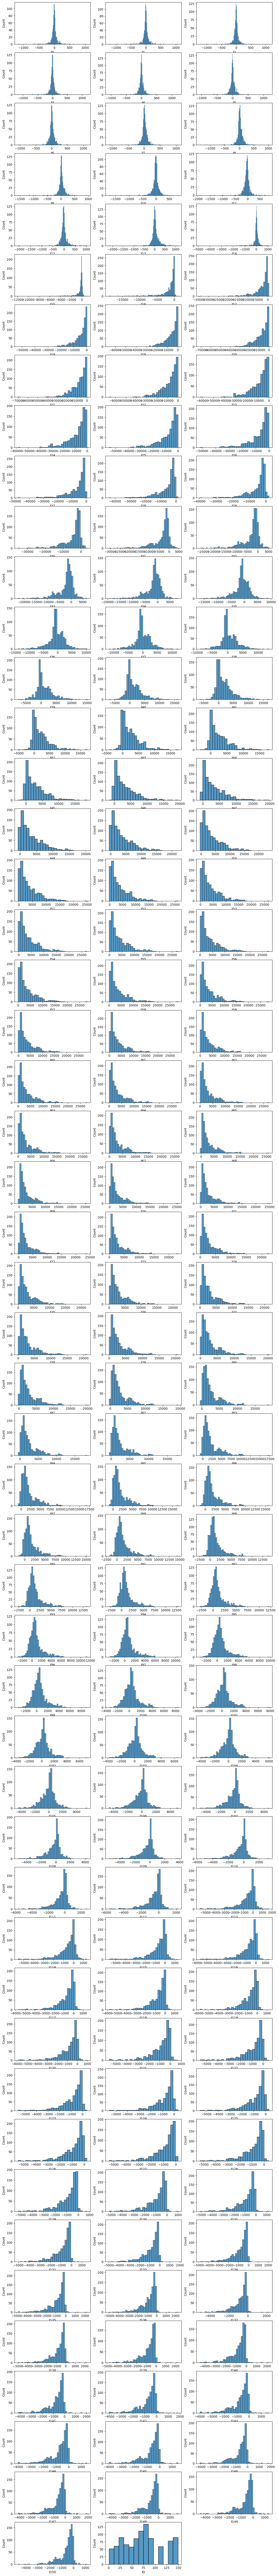

<Figure size 640x480 with 0 Axes>

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

f = plt.figure(figsize=(15, 150))
for i in range(X.shape[1]):
    ax = f.add_subplot(51, 3, i+1)
    sns.histplot(X.iloc[:, i], ax=ax)
    
plt.show()
plt.savefig('testing_figure.png')

In [17]:
fig = f.get_figure()
fig.savefig("output.png")

### Example of signal from the different smells

In [68]:
df

,t0,t1,t2,t3,t4,t5,t6,t7,t8,t9,...,t145,t146,t147,t148,t149,t150,label,ID,date,channel
0,-12.666667,-5.333333,1.333333,0.666667,-2.666667,0.666667,20.666667,51.666667,69.333333,51.333333,...,-140.000000,-168.000000,-192.000000,-214.000000,-233.333333,-245.000000,8-Van,83,1.12,1
1,-9.666667,-18.333333,-31.666667,-43.333333,-38.666667,-12.333333,27.666667,59.666667,70.333333,62.333333,...,-251.000000,-234.000000,-217.000000,-214.000000,-230.333333,-258.000000,8-Van,83,1.12,1
2,-59.166667,-67.833333,-66.166667,-56.833333,-42.166667,-28.833333,-23.833333,-27.833333,-38.166667,-48.166667,...,-254.500000,-274.500000,-296.500000,-302.500000,-282.833333,-245.500000,8-Van,83,1.12,1
3,56.166667,58.500000,32.166667,-3.500000,-23.833333,-24.500000,-15.500000,-10.500000,-15.833333,-35.833333,...,-1996.166667,-1945.166667,-1872.166667,-1798.166667,-1736.500000,-1686.166667,5-Lem,83,1.12,1
4,59.833333,59.166667,54.833333,53.166667,56.833333,66.166667,83.166667,109.166667,133.833333,133.833333,...,-1770.500000,-1814.500000,-1803.500000,-1722.500000,-1594.833333,-1472.500000,5-Lem,83,1.12,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
967,-679.166667,-700.166667,-687.500000,-656.500000,-628.166667,-613.166667,-606.500000,-582.500000,-530.833333,-470.500000,...,-885.500000,-984.166667,-1055.500000,-1039.833333,-946.166667,-833.833333,1-Benz,12,6.6.21,2
968,-230.000000,-219.500000,-197.000000,-176.000000,-163.500000,-156.000000,-147.500000,-138.000000,-132.500000,-122.500000,...,-28.000000,-130.000000,-215.500000,-251.500000,-238.000000,-212.000000,7-Cit,14,6.6.21,2
969,-110.750000,-101.250000,-85.750000,-63.750000,-34.250000,0.250000,23.750000,28.250000,19.750000,26.750000,...,216.250000,116.250000,11.750000,-60.250000,-82.750000,-72.750000,7-Cit,14,6.6.21,2
970,-447.250000,-408.750000,-351.250000,-282.250000,-210.750000,-142.250000,-89.750000,-64.250000,-94.750000,-193.750000,...,-1178.250000,-1144.250000,-1080.750000,-988.750000,-900.250000,-846.250000,1-Benz,14,6.6.21,2


In [71]:
labels = df['label'].unique()
labels.shape

(8,)

In [72]:
labels.shape[0]

8

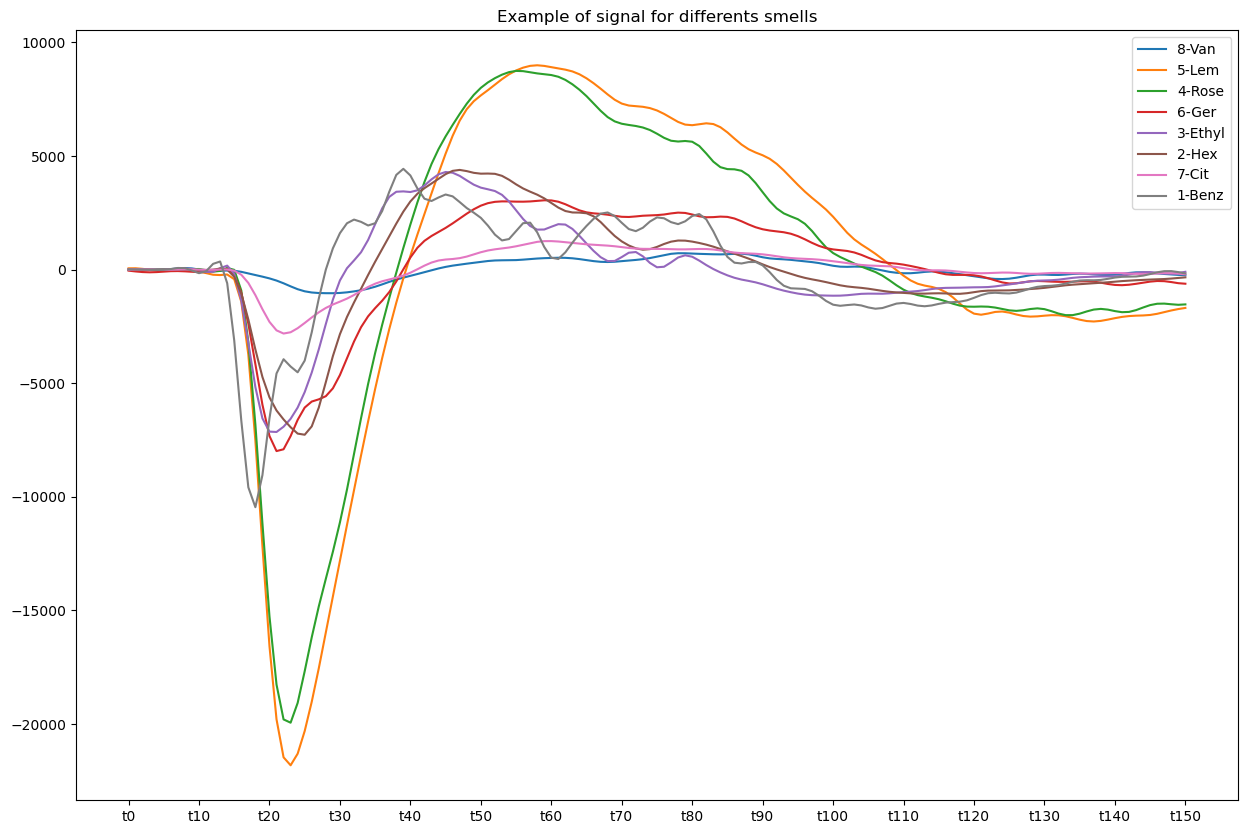

In [73]:
f = plt.figure(figsize=(15, 10))
for i in range(labels.shape[0]):
    temp_df = df[df['label'] == labels[i]]
    plt.plot(temp_df.iloc[0, :-4], label=labels[i])
    
plt.legend()
plt.xticks(np.arange(0, 160, 10))
plt.title('Example of signal for differents smells')
plt.show()

From this plot, we can infer that there are 2 smells that are similar: Lemon and Rose. Also, we can say that the 6 other smells are acting similarly in globality but if we look in detail none of the curve are taking the same path.

Now that we looked at the data as is, let's try to normalize the features and see if it doesn't transform the result.

In [76]:
df = df.drop(columns=['date', 'channel'])

In [81]:
X = df.loc[:, df.columns != 'label']

In [82]:
X_enc = pd.DataFrame(StandardScaler().fit_transform(X))
X_enc.head()

,0,1,2,3,4,5,6,7,8,9,...,142,143,144,145,146,147,148,149,150,151
0,-0.064033,0.000096,0.046421,0.025361,-0.016238,-0.004618,0.121350,0.285879,0.343071,0.256358,...,0.768857,0.800666,0.793702,0.753319,0.699589,0.650917,0.604705,0.561365,0.528282,0.252925
1,-0.039886,-0.105251,-0.223233,-0.339083,-0.320372,-0.115739,0.180437,0.350624,0.350792,0.338094,...,0.602436,0.603568,0.600872,0.596276,0.604423,0.614177,0.604705,0.565935,0.508181,0.252925
2,-0.438314,-0.506381,-0.505145,-0.450901,-0.349940,-0.256776,-0.254275,-0.357523,-0.486911,-0.482981,...,0.608428,0.612404,0.612663,0.591324,0.546026,0.497343,0.472148,0.485947,0.527509,0.252925
3,0.490010,0.517378,0.298371,-0.009150,-0.195058,-0.219736,-0.183933,-0.217243,-0.314481,-0.391338,...,-1.755627,-1.790375,-1.839565,-1.872784,-1.862925,-1.818267,-1.768092,-1.728838,-1.700178,0.252925
4,0.519523,0.522781,0.483588,0.460209,0.486427,0.555259,0.648914,0.751234,0.841061,0.869377,...,-1.296751,-1.319153,-1.414136,-1.553511,-1.674515,-1.717354,-1.654757,-1.512996,-1.369787,0.252925


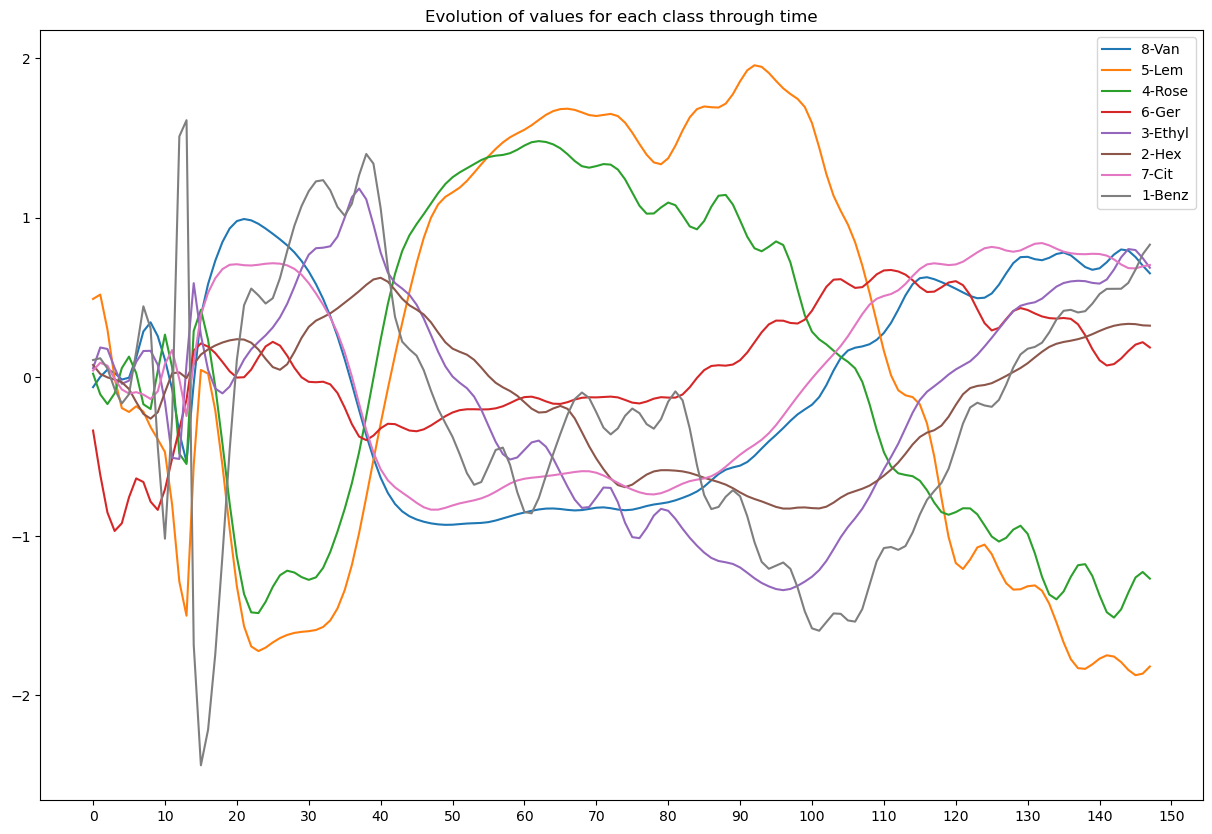

In [83]:
f = plt.figure(figsize=(15, 10))
for i in range(labels.shape[0]):
    index = df[df['label'] == labels[i]].index
    plt.plot(X_enc.iloc[index[0], :-4], label=labels[i])

plt.legend()
plt.xticks(np.arange(0, 160, 10))
plt.title('Evolution of values for each class through time')
plt.show()

A baseline model would be to pick predict the label based on the number of time each label appears in the dataset.

In [13]:
class BaselineModel:
    def __init__(self):
        self.total = 0
        
    def fit(self, X, y):
        self.total = y.shape[0]
        
    def predict(self, X):
        res = []
        for _ in range(X.shape[0]):
            res.append(y[np.random.randint(self.total)])
        return res

In [14]:
baseline_model = BaselineModel()
baseline_model.fit(X_enc, y)
y_pred = baseline_model.predict(X_enc)

In [15]:
accuracy_score(y, y_pred)

0.1286008230452675

### Another option for baseline

Since all target are more of less evenly distributed, and that there is 8 target, the baseline is 1/8